In [176]:
import requests
import urllib.request
import os
from multiprocessing import Pool

# pen_url = "http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02783161"
# r = requests.get(pen_url)
# urls = r.content.decode().split('\r\n')
# urls = list(enumerate(urls))

In [9]:
folder_name = 'pen'
resized_folder_name = 'resized_pen'

def download_image(i_url):
    i, url = i_url
    
    try:
        image_name = "{}.jpg".format(i + 1)
        image_path = os.path.join(folder_name, image_name)
        
        urllib.request.urlretrieve(url, image_path)

    except Exception as e:
        print(str(e))


def listdir(folder_path):
    all_files = os.listdir(folder_path)
    res = list(filter(lambda x: x.startswith('.') == False, all_files))
    return res


def grey_image(i_image):
    i, image_path = i_image
    
    try:
        image_name = "{}.jpg".format(i + 1)
        image_path = os.path.join(folder_name, image_name)
        resized_image_path = os.path.join(resized_folder_name, image_name)
        
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        resized_image = cv2.resize(img, (100, 100))
        cv2.imwrite(resized_image_path, resized_image)

    except Exception as e:
        print(str(e))

In [90]:
images = list(enumerate(listdir(folder_name)))

In [94]:
# p = Pool()
# # p.map(download_image, urls)
# p.map(grey_image, images)
# del p

FACES [[295 123  83  83]
 [ 30 121 117 117]]
EYES [[18 17 23 23]
 [45 23 22 22]]
SMILES [[13 49 52 26]]
EYES [[68 38 28 28]
 [19 28 32 32]]
SMILES [[22 74 66 33]]


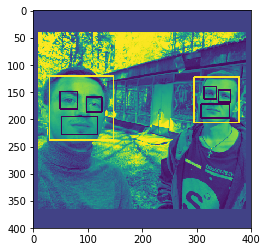

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
smile_cascade = cv.CascadeClassifier('haarcascade_smile.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

img = cv.imread('test.jpg')
resized_image = cv.resize(img, (400, 400))
gray = cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print('FACES', faces)

for (x, y, w, h) in faces:
    cv.rectangle(gray, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    smiles = smile_cascade.detectMultiScale(roi_gray)
    print('EYES', eyes)
    print('SMILES', smiles)
    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(roi_gray, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    
    for (ex, ey, ew, eh) in smiles:
        cv.rectangle(roi_gray, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        
plt.imshow(gray)
plt.show()

# Iris detection

FACES [[ 96 111 549 549]]
EYES [[519 136  25  25]
 [129 161 109 109]
 [351 203  99  99]
 [321 332  47  47]
 [251 444  65  65]]


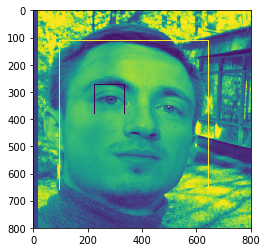

In [78]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

img = cv.imread('iris.jpg')
resized_image = cv.resize(img, (800, 800))
gray = cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print('FACES', faces)

for (x, y, w, h) in faces:
    cv.rectangle(gray, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    print('EYES', eyes)
    for (ex, ey, ew, eh) in eyes[1:2]:
        cv.rectangle(roi_gray, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        eroi = roi_gray[ey:ey+eh, ex:ex+ew]
        
plt.imshow(gray)
plt.show()

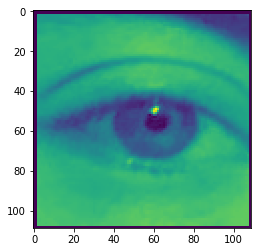

In [79]:
plt.imshow(eroi)
plt.show()

[[[60.5 52.5 21.6]]]


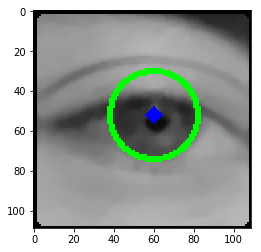

In [104]:
img = cv.medianBlur(eroi, 5)
cimg = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 1, 50, param1=50, param2=30, minRadius=0, maxRadius=60)
print(circles)
circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    cv.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # Draw the center of the circle.
    cv.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
    
plt.imshow(cimg)
plt.show()

In [1]:
%matplotlib notebook

import cv2
import matplotlib.pyplot as plt
import signal
import os
import numpy as np

def listdir(folder_path):
    all_files = os.listdir(folder_path)
    res = list(filter(lambda x: x.startswith('.') == False, all_files))
    return res

# %matplotlib notebook

In [10]:
plt.imshow(frame)
plt.draw()

<IPython.core.display.Javascript object>


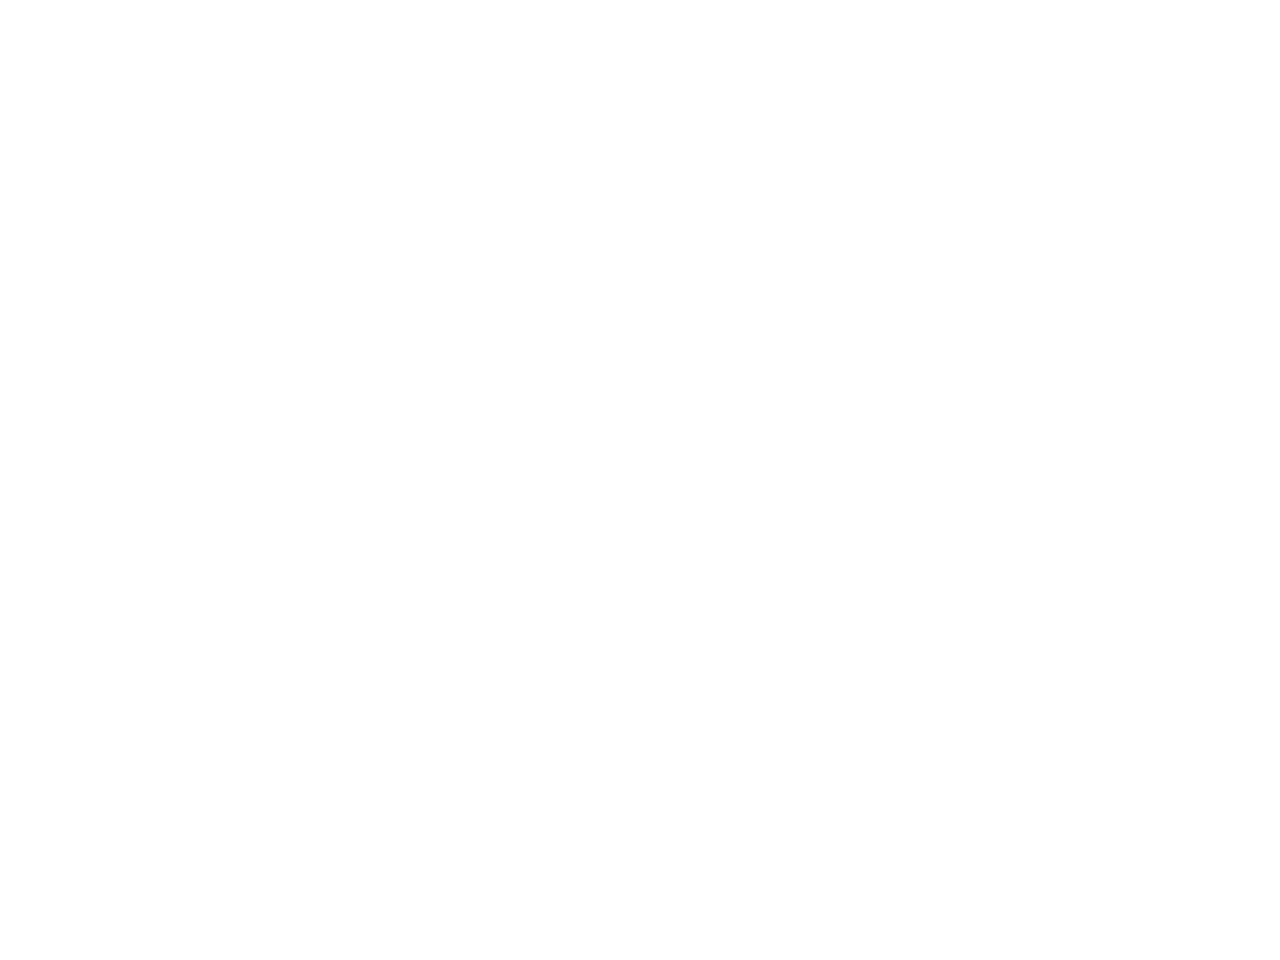

kek
kek
kek
kek
kek


KeyboardInterrupt: 

In [2]:
plt.ion()

frame = cv2.imread(os.path.join('resized_pen', np.random.choice(listdir('resized_pen/'))))
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
webcam_preview = plt.imshow(frame)   
while True:
    frame = cv2.imread(os.path.join('resized_pen', np.random.choice(listdir('resized_pen/'))))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview.set_data(frame)
    plt.draw()
    plt.show()
    plt.pause(2)
    print('kek')

In [1]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from IPython import display
import os
import numpy as np


def listdir(folder_path):
    all_files = os.listdir(folder_path)
    res = list(filter(lambda x: x.startswith('.') == False, all_files))
    return res


while True:
    frame = cv2.imread(os.path.join('resized_pen', np.random.choice(listdir('resized_pen/'))))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored

    plt.imshow(frame)    
    display.clear_output(wait=True)

    plt.pause(0.1)

KeyboardInterrupt: 